Adapted by Carlos Toxtli https://www.carlostoxtli.com/#linreg-1

Source: https://github.com/Patrickbfuller/lin_reg_tutorial/blob/master/linear_regression.ipynb

In [ ]:
!git clone https://github.com/Patrickbfuller/lin_reg_tutorial.git
%cd lin_reg_tutorial

Cloning into 'lin_reg_tutorial'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 52 (delta 23), reused 32 (delta 6), pack-reused 0
Unpacking objects: 100% (52/52), done.
/content/lin_reg_tutorial


# Business Understanding

Linear Regression
* Fast
* Easily interpretable feature effect
* Easily evaluated
* Easily explained to non-technical
* Easily visualized

#### Assumptions of Linear Regression
* Linear relationship
* Normality
* Little to no multi-collinearity
* Evenly distributed (heteroskedastic) residuals.
* Non-autocorrelating residuals

# Data Understanding

* Data Quality
    * Data Types
        * Ints, Floats, Strings, Booleans
        * Numerical vs categorical?
    * Missing data? / Duplicates?
* Distribution
    * Range
    * Skew
* Correlation
* Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
df = pd.read_csv('data/kc_house_data.csv')

## Look at the data!

Bread and butter of first examinations: head(), info(), describe(),

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [ ]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

Taking a look at the column names, it is imperative to have an explanation of what the data in the column describes.  
For public dataset a quick search (google 'kc housing data metadata') will often find what is needed.  
If it is not public, ask up the chain where the data came from.  
On kaggle, there is a version of this dataset with a description of the columns: https://www.kaggle.com/harlfoxem/housesalesprediction.  
![](https://github.com/Patrickbfuller/lin_reg_tutorial/blob/master/kc_columns.png?raw=1)

Examine the 'info' about the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Things to take note of:
* 21 Total columns
* Total number of rows: 21597
    * Waterfront, view, and yr_renovated have less entries (nulls are present)
* Mix of integer (int64), floating point (float64) and string (object) data types present
* The 'date' and 'sqft_basement' columns are strings - these should be converted.
* yr_built and yr_renovated have been input as float and int but should probably be datetime objects

Examine the number of rows in each column that are missing data.  

In [ ]:
df.isna().sum() 

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The below calculates the percentage of missing values in each column.

In [ ]:
round(df.isna().sum() / len(df), 4) * 100

id                0.00
date              0.00
price             0.00
bedrooms          0.00
bathrooms         0.00
sqft_living       0.00
sqft_lot          0.00
floors            0.00
waterfront       11.00
view              0.29
condition         0.00
grade             0.00
sqft_above        0.00
sqft_basement     0.00
yr_built          0.00
yr_renovated     17.79
zipcode           0.00
lat               0.00
long              0.00
sqft_living15     0.00
sqft_lot15        0.00
dtype: float64

__NOTE ON NON_NULL MISSING DATA__  
Technically there may still be missing data. Sometimes there is non-valid data entered as something like an empty string(' ') or irrelevant numbers(-999).  
More on this in a bit.

Use describe to take a quick look at distributions. (Can be a good way to spot '-999s')

In [ ]:
df.describe()     # Only describes numeric datatypes (missing date and sqft_basement), will look at non-numeric datatypes below

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


__Ultimately vizualizing the data with histograms will give us a more easy to read glimpse at distribution but this can be a great first look.__  
Hint: mininum __yr_renovated__?  
Or the min and max of __waterfront__??

What about not numeric data?

In [ ]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
df.select_dtypes('O')     # Viewing columns of a DataFrame where the values are strings - 'O' short for 'object'

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
5,5/12/2014,1530.0
6,6/27/2014,?
7,1/15/2015,0.0
8,4/15/2015,730.0
9,3/12/2015,0.0


Both of these ultimately shouldn't be string. They should be datetime and float types.  
This can be changed quickly using the method below. However for the sake of data flow from raw data to model, it will be added to a pipeline later.

Converting to datetime:

In [ ]:
pd.to_datetime(df.date)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
5       2014-05-12
6       2014-06-27
7       2015-01-15
8       2015-04-15
9       2015-03-12
10      2015-04-03
11      2014-05-27
12      2014-05-28
13      2014-10-07
14      2015-03-12
15      2015-01-24
16      2014-07-31
17      2014-05-29
18      2014-12-05
19      2015-04-24
20      2014-05-14
21      2014-08-26
22      2014-07-03
23      2014-05-16
24      2014-11-20
25      2014-11-03
26      2014-06-26
27      2014-12-01
28      2014-06-24
29      2015-03-02
           ...    
21567   2014-06-10
21568   2014-12-02
21569   2014-08-28
21570   2014-10-15
21571   2015-03-05
21572   2014-11-13
21573   2014-09-10
21574   2014-05-14
21575   2014-10-02
21576   2015-04-16
21577   2015-03-17
21578   2014-10-17
21579   2014-10-31
21580   2014-08-13
21581   2015-04-21
21582   2014-10-13
21583   2014-09-15
21584   2014-10-15
21585   2015-04-07
21586   2014-06-26
21587   2014-08-25
21588   2015

Converting to float:

In [ ]:
# df.sqft_basement = df.sqft_basement.astype('float')

The above will throw an error for the '?' value in sqft_basement.  
This is an example of the NON_NULL missing data mentioned above.  
We will want to remove or fill these cells, depending on how many there are.

Two methods for discovering problematic datapoints:
- .value_counts()
- .unique()

In [ ]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
506.0         1
602.0         1
172.0         1
225.0         1
283.0         1
143.0         1
2500.0        1
4130.0        1
862.0         1
20.0          1
2300.0        1
792.0         1
243.0         1
1548.0        1
2730.0        1
1135.0        1
2720.0        1
2120.0        1
2810.0        1
1920.0        1
1281.0        1
176.0         1
415.0         1
516.0         1
2050.0        1
4820.0        1
374.0         1
704.0         1
906.0         1
2196.0        1
Name: sqft_basement, Len

In [ ]:
df['sqft_basement'].unique()     # This may be messy for large datasets.

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [ ]:
sum(df.sqft_basement == '?')/len(df) * 100

2.1021438162707784

2.1% of the __sqft_basement__ is missing.
And from before  
11.0% of __waterfront__ is missing  
0.29% of __view__ is missing  
17.79% of __yr_renovated__ is missing

## Missing Data

Missing data needs to be filled or dropped.

Dropping values comes in two forms
* Dropping a column
    * Dropping an entire column from the DataFrame (Losing columns, not losing any rows)
    * Gut instincts - when the column is mostly missing values.
* Dropping rows 
    * Dropping an entire rows where there is a missing value in the row and column (Losing rows, not losing any columns)
    * Gut instinct - when there are few missing values in a column

##### ! Note: Depending on the business understanding in your domain, it may be acceptable to drop a column on the grounds that it is not predictive of your target. 

If the column contains impactful data and there are rows with a NaN in that column, then the NaNs can be filled (*imputed*). Note that this explanation is in the context of machine learning models, __*not*__ hypothesis testing or making stastical claims.

Nan's are most commonly filled with the mean or the median depending on the distribution. Another option is to bin the data and create categorical features based on the bins and leave the nans in a bin of their own.

To Summarize, common options are:
* Impute the mean (numerical)
* Impute the median (numerical)
* Imput the mode (categorical)
* Bin and include missing category
* Remove

* Double check you can't engineer the feature from other columns (though beware this is likely a sign of collinearity)
    * eg. sqft_basement can be deduced with the difference between sqft_living and sqft_above

Discussion: To drop or not?  

__sqft_basement__: Dropping 2.1% of rows wouldn't be a huge loss. In this case, we can deduce and engineer the feature where missing.  
__waterfront__: Dropping 11% is a rather significant loss of information and is rarely the best option. For this excercise it will be filled with the mode.  
__view__: Dropping 0.3% of data will not lose a lot of information and therefore dropping is a viable option for __view__. Imputing the value is also viable.  
__yr_renovated__: Dropping 17.79% is very significant. For tutorial purposes, this column will be binned with nans included. Though it could also be an opportunity to deduce yr_built if no yr_renovated.

Final check for data quaility: Checking for duplicated entries!

In [ ]:
df.duplicated().sum()

0

Good. No duplicate rows.

* ~~Data Quality~~  
    * ~~Data Types~~
        * ~~Ints, Floats, Strings, Booleans~~
        * ~~Numerical vs categorical?~~
    * ~~Missing data? / Duplicates?~~
* Distribution
    * Range
    * Skew
* Correlation
* Visualization

### Lets take a look at the distributions!
Make a copy of the raw df that can be altered for vizualizations

In [ ]:
df_viz = df.copy()

Examine distributions with histograms. First lets look at the target.

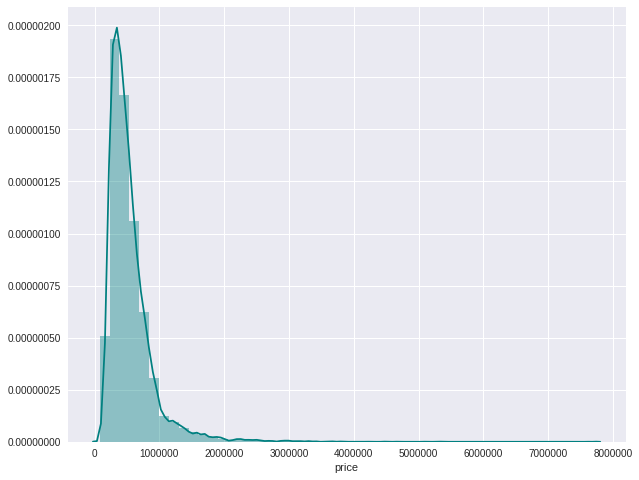

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df_viz['price'], color='teal');

This is far from a normal distribution. Perhaps a computation of the price will be better? The data is left skewed so maybe a __square root__ or __log__ of the price is a good place to look.

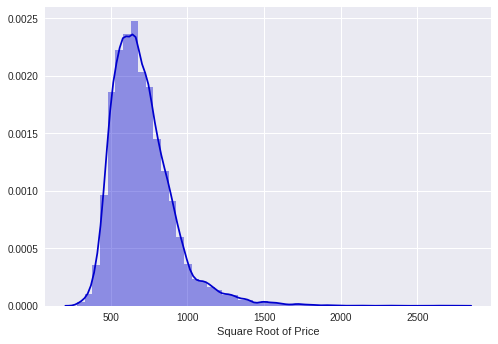

In [ ]:
sns.distplot(df_viz['price']**0.5, color='mediumblue')
plt.xlabel('Square Root of Price');

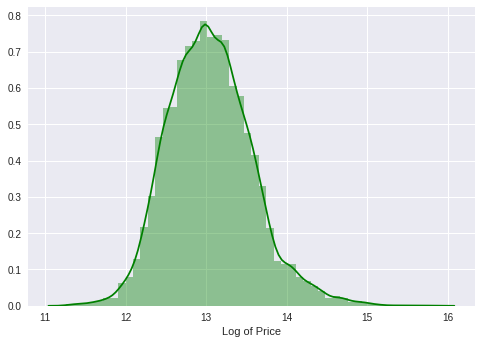

In [ ]:
sns.distplot(np.log(df_viz['price']), color='green')
plt.xlabel('Log of Price');

That seems to capture the distribution in a more normal distribution. Let's add a target for log price.

In [ ]:
df_viz.loc[:,'log_price'] = np.log(df_viz['price'])
targets = ['price', 'log_price']

### Predictors
What about predictors? Time to coerce our object dtypes.
#### __date__ column

In [ ]:
df_viz.date = pd.to_datetime(df_viz.date)

#### __sqft_basement__ column

Recall that our string '?'s can't be converted to numeric.
For vizualization purposes lets calculate the missing values from the other features.  
 \* __sqft_living__ and __sqft_above__ are floats and CAN be subtracted.

In [ ]:
df_viz.loc[df['sqft_basement']=='?','sqft_basement'] = df_viz.sqft_living - df_viz.sqft_above

In [ ]:
df_viz.sqft_basement = df_viz.sqft_basement.astype('float')

Quick check that the relationship is correct. 

In [ ]:
sum(df_viz.sqft_above + df_viz.sqft_basement != df_viz.sqft_living)

0

### Initial general look at the distributions

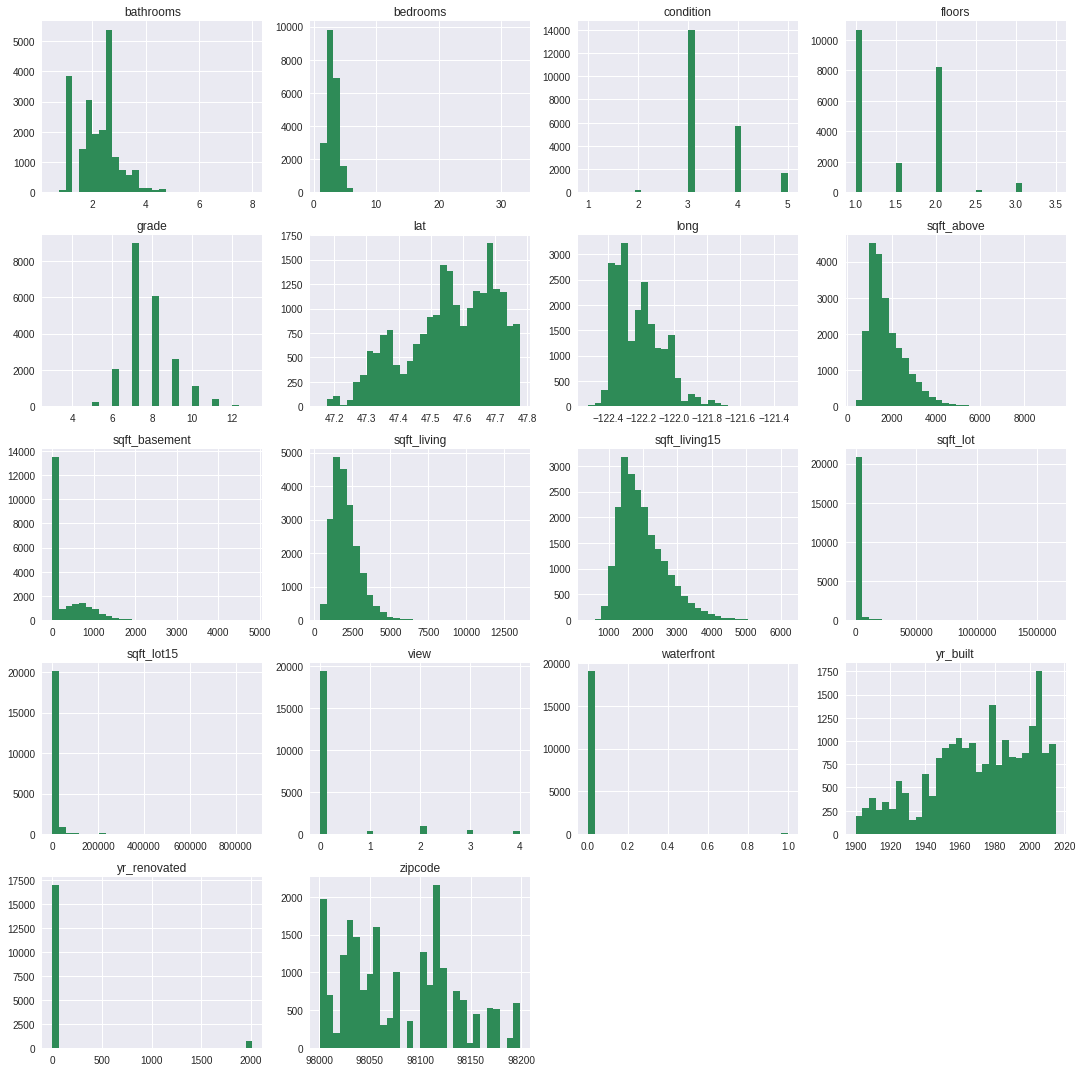

In [ ]:
df_viz.drop(['id', 'price', 'log_price'], axis=1).hist(figsize=(15,15), color='seagreen', bins=30)
plt.tight_layout()

### Other than __grade__, there's not a lot of pretty bell curves in our data.
It's not problematic for categorical data such as the __waterfront__(true or false) or __zipcode__. But what about the the numerical features? Maybe logging also them would be helpful.

BUT FIRST! 2 Things:
* The date column is missing
    * The datetime can be visualized differently below
* The yr_renovated column has a lot of 0's. 
    * This is missing data. Since this column was going to be binned with missing in this tutorial, there's no need to adjust the policy. But in general this sort of discovery could mean re-evaluting the handling of the missing data.   

### Visualizing DateTime
Recall that the above does not include the datetime objects in the date column. This feature has a categorical effect on the target and doesn't have to be normally distributed. But it is good to check that there is nothing strange going on. Lets visualize them by month.

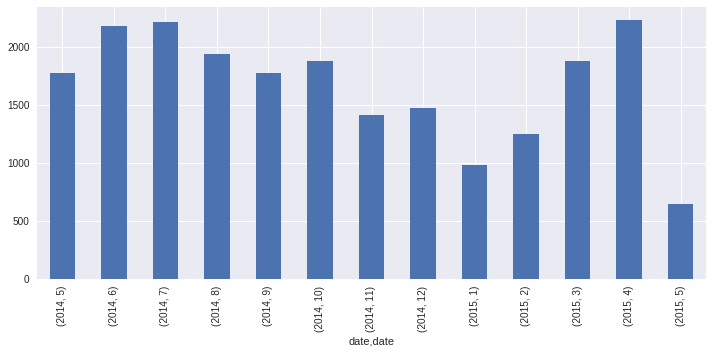

In [ ]:
monthly_counts = df_viz.date.groupby(
    [df_viz.date.dt.year, df_viz.date.dt.month]
).count()
monthly_counts.plot(kind='bar',figsize=(12,5));
     # This line inspired by the helpful folks at https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

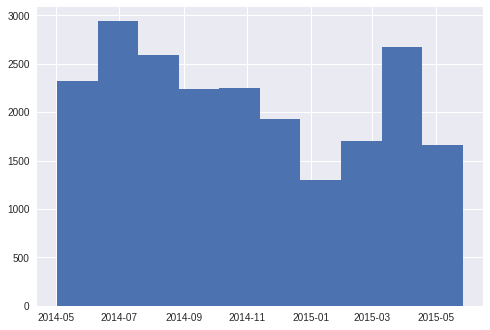

In [ ]:
df_viz['date'].hist();

### Feature Transformation

Before manipulating every column, we should clarify which features should be distributed normally.
Lets organize a little. The features whose distributions should be normal are the numeric data. We can omit the following from numeric:
* ID - not predictive
* Price - target
* Date - datetime object
* Lat and Long - often combined to calculate a distance but unlikely a linear impact on target
* Waterfront - a boolean 0 or 1
* Zipcode - a categorical region

In [ ]:
categorical = ['date', 'waterfront', 'zipcode', 'yr_renovated']     # yr_renovated to be binned

In [ ]:
numeric = list(df_viz.drop(['id', 'price', 'log_price', 'date', 'lat', 'long', 'waterfront', 'zipcode'], axis=1).columns)
numeric = list(df_viz.drop(['id', 'price', 'log_price', 'lat', 'long'] + categorical, axis=1))
numeric

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'sqft_living15',
 'sqft_lot15']

Now lets see if any of the distributions look better logged. A powerful alternative for predictive modeling is a *power transform*. But keep in mind, it is less transparent for describing the effect a feature has on the target in an analytical context.

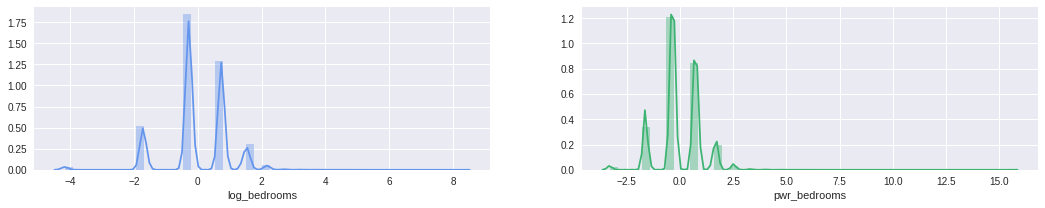

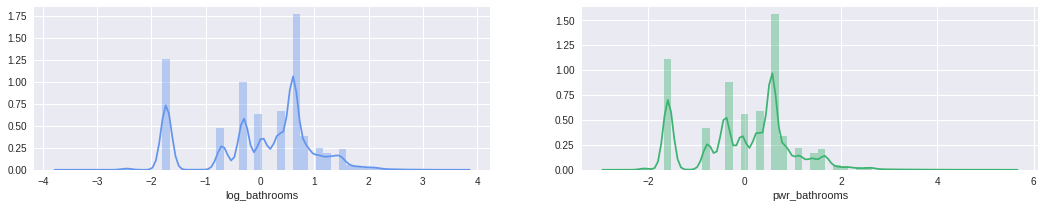

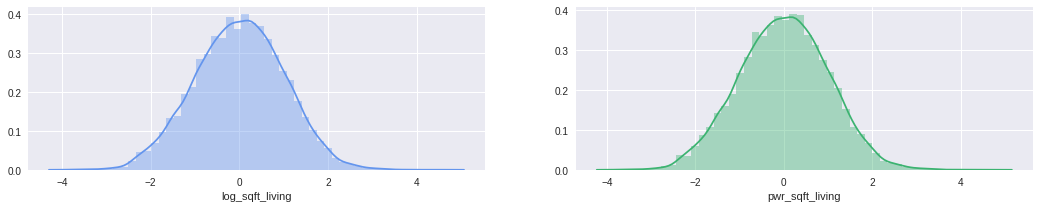

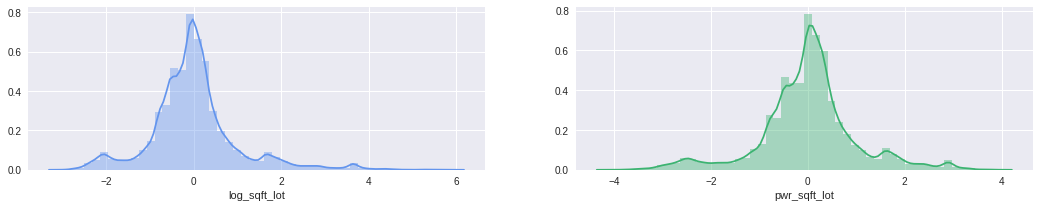

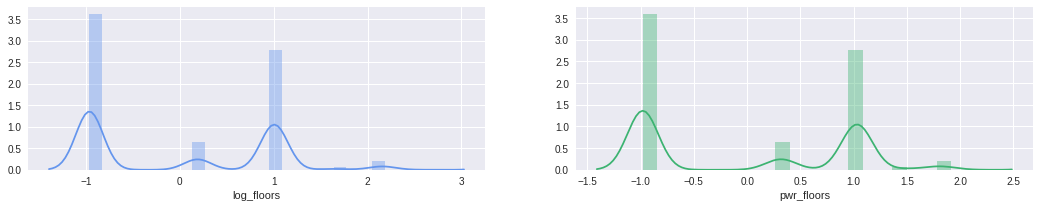

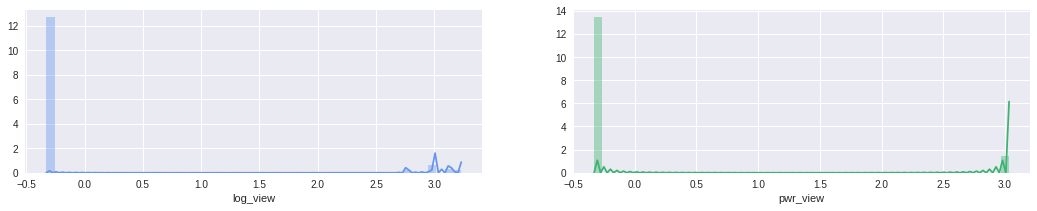

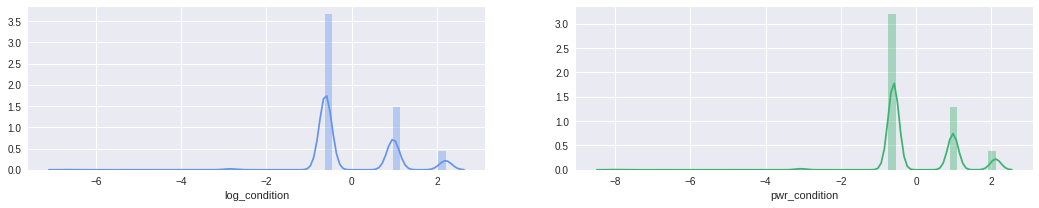

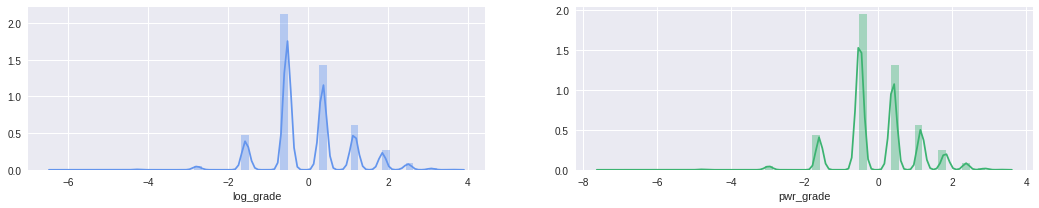

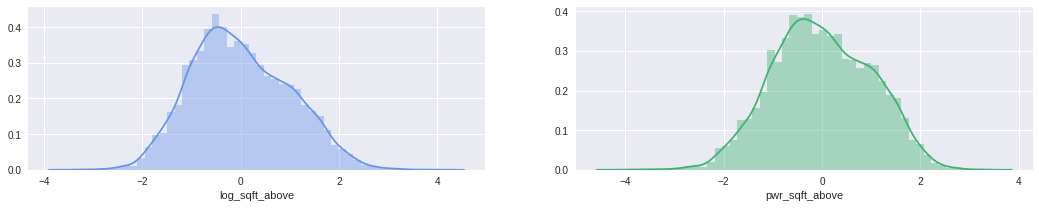

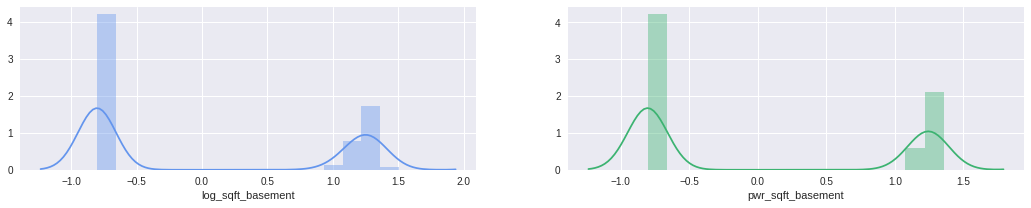

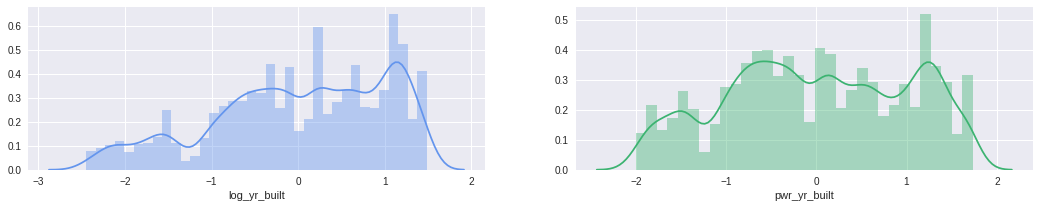

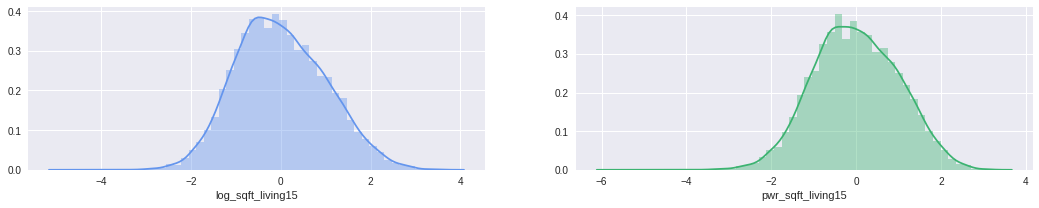

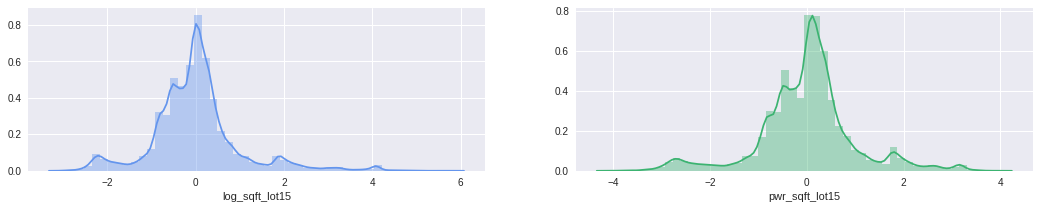

In [ ]:
from sklearn.preprocessing import power_transform, scale
for col in numeric:
    s = df_viz[[col]].dropna() + 0.0001
    s1 = scale(np.log(s))
    s2 = power_transform(s, method='box-cox')
    plt.figure(figsize=(18,3))
    plt.subplot(1,2,1)
    sns.distplot(s1, color='cornflowerblue', axlabel='log_'+col)
    plt.subplot(1,2,2)
    sns.distplot(s2, color='mediumseagreen', axlabel='pwr_'+col)
    plt.show()

A nother version but with one plot picture instead of many smaller plot pictures.

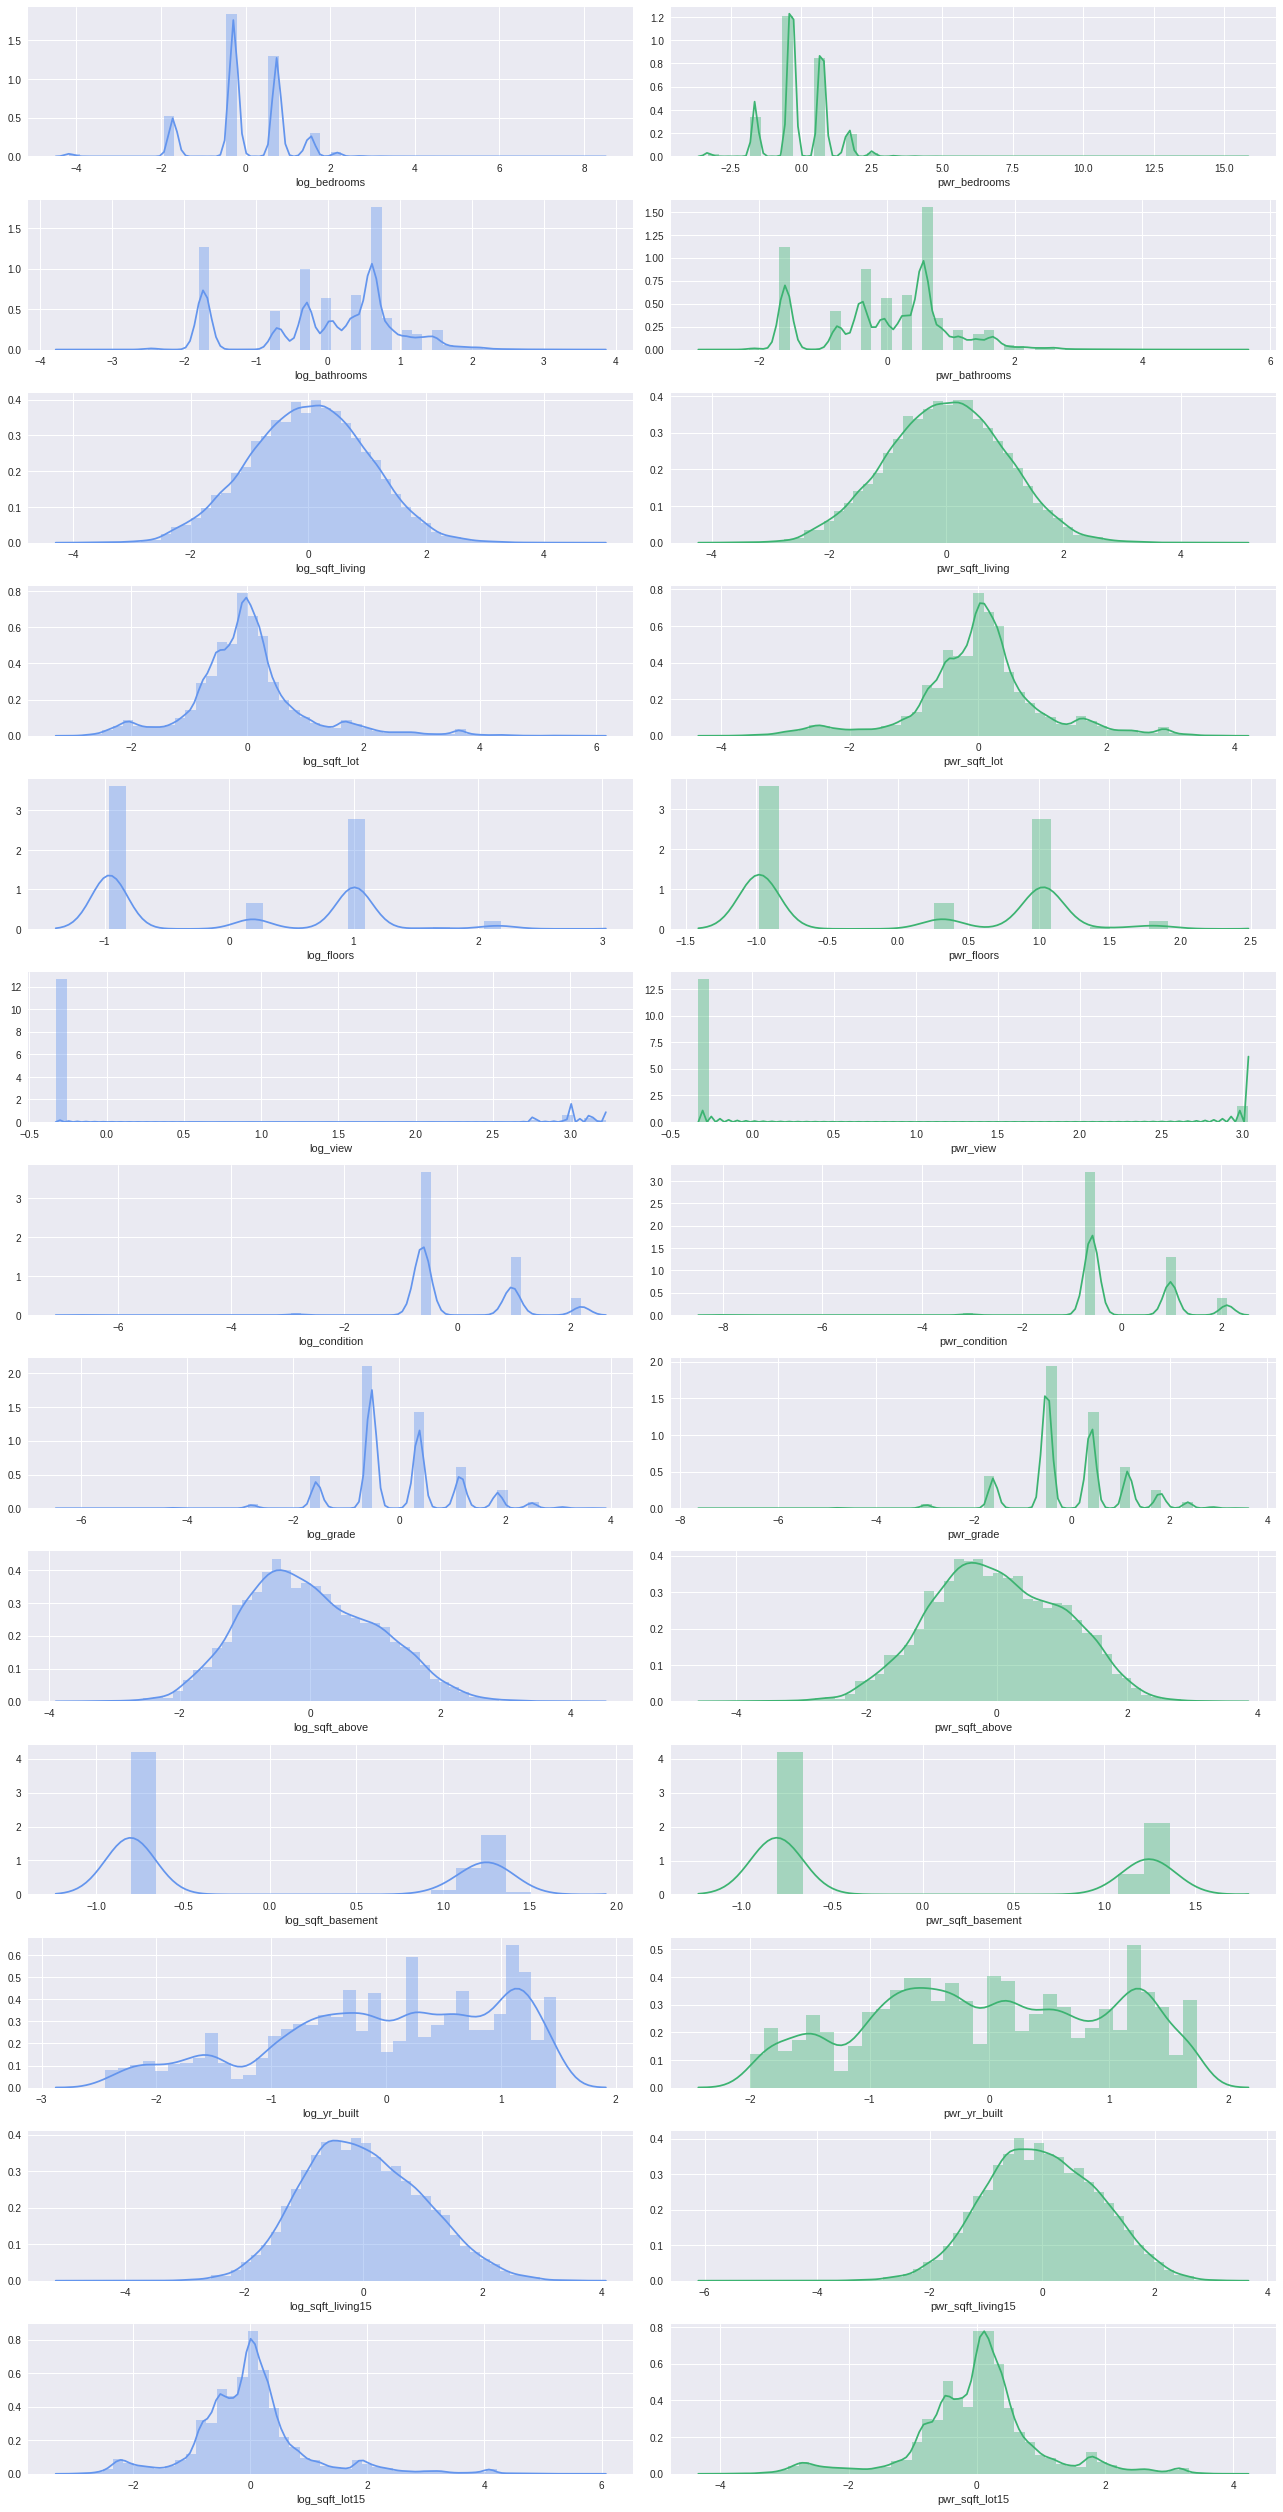

In [ ]:
plt.figure(figsize=(18,35))
n = 1
i = len(numeric)
for col in numeric:
    s = df_viz[[col]].dropna() + 0.0001
    s1 = scale(np.log(s))
    s2 = power_transform(s, method='box-cox')
    plt.subplot(i,2,n)
    sns.distplot(s1, color='cornflowerblue', axlabel='log_'+col)
    plt.subplot(i,2,n+1)
    sns.distplot(s2, color='mediumseagreen', axlabel='pwr_'+col)
    n += 2
plt.tight_layout()

Well through these columns this is the take away:
- **bedrooms** - log captures well
- **bathrooms** - log captures well
- **sqft_living** - log captures well
- **sqft_lot** - power captures well
- **floors** - non normal - will try categorical
- **view** - non normal - will try categorical
- **condition** - non normal - will try categorical
- **grade** - raw normal - no transformation
- **sqft_above** - pwr captures well
- **sqft_basement** - bimodal - will try categorical
- **yr_built** - power captures well
- **sqft_living15** - log captures well
- **sqft_lot15** - power captures well

In [ ]:
non_normal = ['floors', 'view', 'condition', 'sqft_basement']
categorical = categorical + non_normal
numeric = [x for x in numeric if x not in non_normal]

In [ ]:
numeric_to_log = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_living15']
numeric_to_pwr = [x for x in numeric if x not in numeric_to_log and x != 'grade']

### Target Correlation Of Numerics
Transforming the numerics for visualization.

In [ ]:
df_viz.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [ ]:
df_tfm = pd.DataFrame()
for col in numeric_to_log:
    df_tfm.loc[:,f'log_{col}'] = np.log(df_viz[col])
for col in numeric_to_pwr:
    df_tfm.loc[:,f'pwr_{col}'] = power_transform(df_viz[[col]], method='box-cox')
df_tfm[['grade', 'log_price']] = df_viz[['grade', 'log_price']]

Quick check into their correlation.

In [ ]:
df_tfm.corr().log_price.sort_values(ascending=False)

log_price            1.000000
grade                0.703720
log_sqft_living      0.674802
log_sqft_living15    0.607154
pwr_sqft_above       0.576573
log_bathrooms        0.520278
log_bedrooms         0.342850
pwr_sqft_lot         0.126461
pwr_sqft_lot15       0.113175
pwr_yr_built         0.104614
Name: log_price, dtype: float64

Looks like grade, log_sqft_living, log_sqft_living_15, sqft_above, and log_bathrooms are the strong indicators.

Visualize with the relationship for the numeric features.

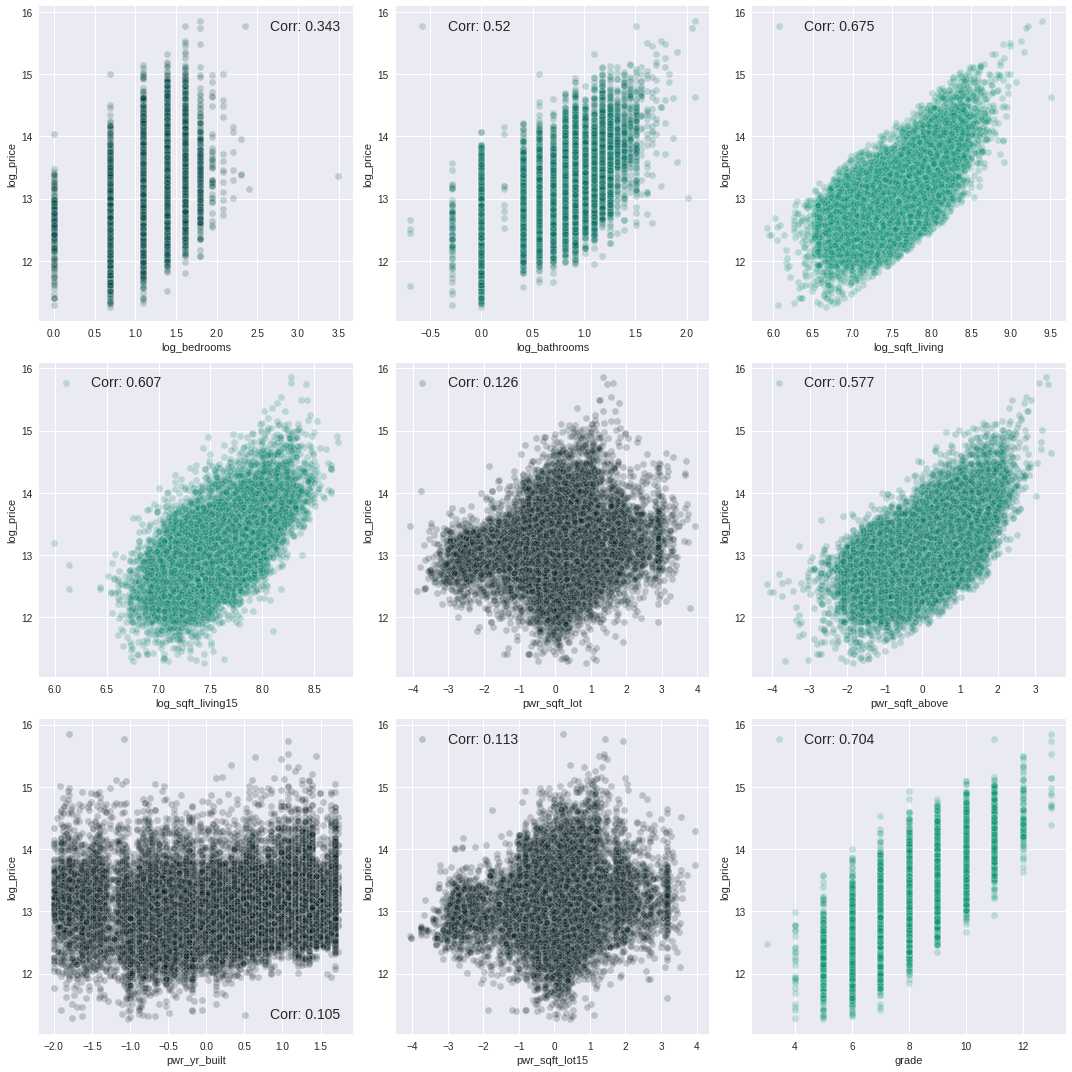

In [ ]:
n = 1
plt.figure(figsize=(15,15))
for col in df_tfm.drop('log_price', axis=1):
    plt.subplot(3,3,n)
    n+=1
    corr = df_tfm.corr().log_price[col]
    color = np.array([0,0.8,0.5 ** corr]) * corr
    sns.scatterplot(
        x=df_tfm[col],
        y=df_tfm['log_price'],
        color=color,
        alpha=0.2,
        label=f'Corr: {round(corr,3)}'
    )
    plt.legend(prop={'size':14})
plt.tight_layout()

What about categorical?

In [ ]:
categorical

['date',
 'waterfront',
 'zipcode',
 'yr_renovated',
 'floors',
 'view',
 'condition',
 'sqft_basement']

Lets check at the effect the month might have on log_price.

In [ ]:
df_monthly = df_viz.groupby(
    [df_viz.date.dt.year, df_viz.date.dt.month]
)
monthly_avgs = df_monthly.log_price.mean()
monthly_avgs

date  date
2014  5       13.061631
      6       13.078965
      7       13.059795
      8       13.044535
      9       13.035465
      10      13.038953
      11      13.011753
      12      13.018059
2015  1       13.008518
      2       12.994354
      3       13.051455
      4       13.096912
      5       13.075735
Name: log_price, dtype: float64

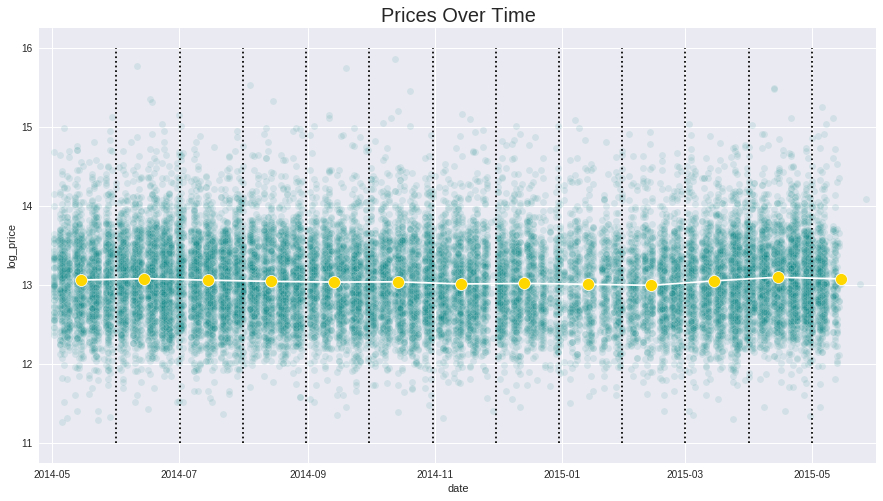

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(
    x='date',
    y='log_price',
    data=df_viz,
    alpha=0.1,
    color='teal'
)

sns.lineplot(
    x=pd.date_range('2014-05-15', '2015-05-15', periods=13),
    y=monthly_avgs.values,
    color='white',
    marker='o',
    markerfacecolor='gold',
    markersize=12
    )

plt.title(label='Prices Over Time',fontdict={'size':20})
plt.xlim('04-25-14','06-01-15')
plt.vlines(
    x=pd.date_range('2014-06', '2015-05', periods=12),
    ymin=11,
    ymax=16,
    linestyles='dotted',
);

Time doesn't really appear to have an correlation with the price.

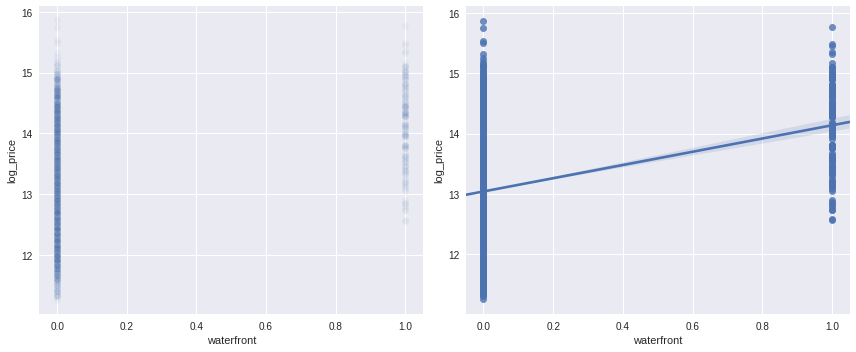

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(df_viz.waterfront, df_viz.log_price, alpha=0.05)
plt.subplot(1,2,2)
sns.regplot(df_viz.waterfront, df_viz.log_price)
plt.tight_layout()

In [ ]:
df_viz.corr().waterfront.log_price

0.1805242480194254

Recall that about 10 percent of this data is missing. What portion of the data we have is waterfront?

In [ ]:
df_viz.waterfront.value_counts()/df_viz.waterfront.count()

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

If we can presume that the missing values are __not waterfront__, what does the correlation look like?

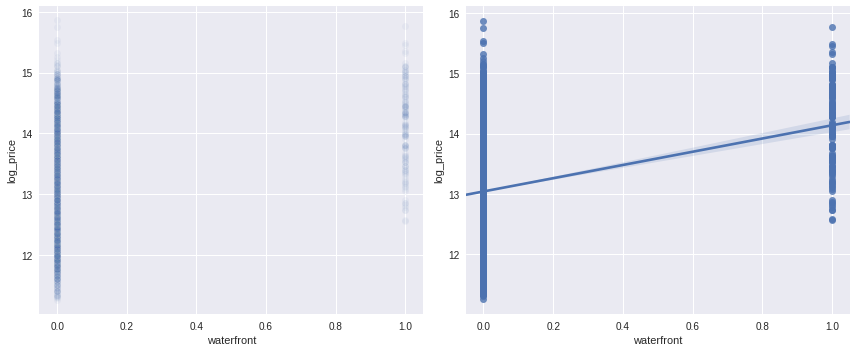

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(df_viz.waterfront.fillna(0), df_viz.log_price, alpha=0.05)
plt.subplot(1,2,2)
sns.regplot(df_viz.waterfront, df_viz.log_price)
plt.tight_layout()

In [ ]:
df_viz.fillna(0).corr().waterfront.log_price

0.1707200124149816

Hmm it actually goes down. Take a look at the distributions of Waterfront, Not Waterfront and Missing prices.

In [ ]:
df_viz.fillna('Missing').groupby('waterfront').log_price.mean()#.plot.bar()

waterfront
0.0        13.041237
1.0        14.137806
Missing    13.037243
Name: log_price, dtype: float64

In [ ]:
wtft_missing_prices = df_viz[df_viz.waterfront.isna()].log_price

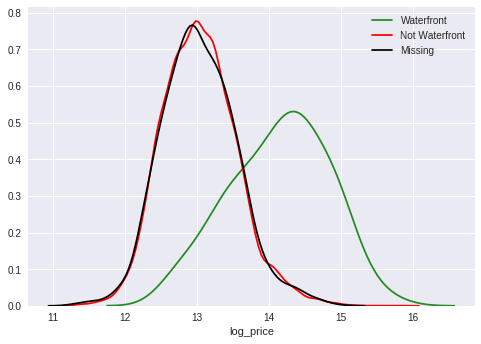

In [ ]:
ax1 = sns.distplot(df_viz[df.waterfront == True].log_price, hist=None, color='forestgreen', label='Waterfront')
ax2 = sns.distplot(df_viz[df.waterfront == False].log_price, hist=None, color='red', label='Not Waterfront')
ax3 = sns.distplot(wtft_missing_prices, hist=None, color='black', label='Missing')
plt.legend();

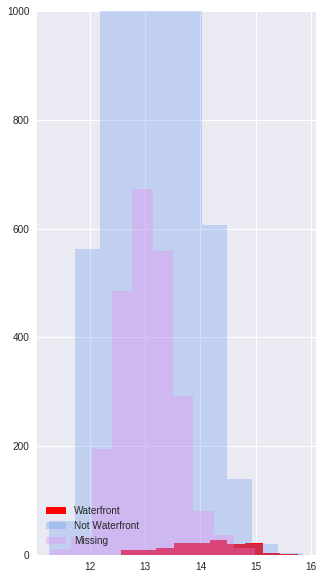

In [ ]:
a=0.3
plt.figure(figsize=(5,10))
plt.hist(df_viz[df.waterfront == True].log_price, color='red', label='Waterfront')
plt.hist(df_viz[df.waterfront == False].log_price, color='cornflowerblue', label='Not Waterfront', alpha=a)
plt.hist(wtft_missing_prices, color='violet', label='Missing', alpha=a)
plt.ylim(0,1000)
plt.legend(loc=3);

### One Hotting

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()

In [ ]:
#sns.distplot()

## Check for Collinearity

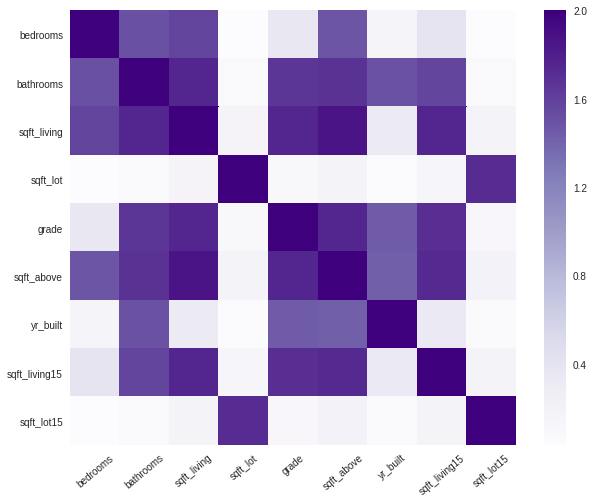

In [ ]:
cutoff = 0.4
hmap = df_viz[numeric].corr() + (df_viz[numeric].corr() > cutoff)
plt.figure(figsize=(10,8))
sns.heatmap(hmap, cmap="Purples")
plt.ylim((9,0))
plt.xticks(rotation=40);

This heatmap highlights an oddity. Why is sqft_lot so unrelated to the other features? Lets take a look by sorting by the lot size.

In [ ]:
df_viz.sort_values(['sqft_lot'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,log_price
15729,9828702895,2014-10-22,700000.0,4,1.75,2420,520,1.5,0.0,0.0,3,7,2420,0.0,1900,0.0,98112,47.6209,-122.302,1200,1170,13.458836
5821,1773101159,2015-01-07,250000.0,3,2.25,1050,572,2.0,0.0,0.0,3,7,740,310.0,2006,0.0,98106,47.5549,-122.363,1260,1062,12.429216
7582,6371000026,2015-01-22,367500.0,2,2.00,1030,600,2.0,NaN,0.0,3,8,680,350.0,2004,0.0,98116,47.5788,-122.410,1120,1267,12.814479
3449,2559950110,2015-04-22,1230000.0,2,2.50,2470,609,3.0,0.0,0.0,3,11,1910,560.0,2011,0.0,98112,47.6182,-122.312,2440,1229,14.022525
20588,7899800857,2014-12-15,256950.0,2,2.00,1070,635,2.0,0.0,0.0,3,9,720,350.0,2008,NaN,98106,47.5212,-122.357,1070,928,12.456637
21536,688000017,2014-06-27,516500.0,1,1.25,1100,638,3.0,NaN,0.0,3,9,1100,0.0,2014,0.0,98112,47.6228,-122.307,1110,1933,13.154831
547,7899800860,2015-03-19,259950.0,2,2.00,1070,649,2.0,0.0,0.0,3,9,720,350.0,2008,0.0,98106,47.5213,-122.357,1070,928,12.468245
4348,7899800864,2015-03-05,259950.0,2,2.00,1070,649,2.0,0.0,0.0,3,9,720,350.0,2008,0.0,98106,47.5213,-122.357,1070,928,12.468245
19646,3362400125,2015-03-03,405000.0,3,2.00,1060,651,3.0,0.0,0.0,3,7,1060,0.0,2007,NaN,98103,47.6828,-122.345,1440,1501,12.911642
21503,1702901618,2015-04-07,420000.0,1,2.00,1070,675,2.0,NaN,0.0,3,8,880,190.0,2007,0.0,98118,47.5574,-122.284,1220,788,12.948010


Some lots have **sqft_living** above 200 and **sqft_lot** below 700, and then some have **sqft_lot** in the millions with **sqft_living** of 710 or 1300.  
There are sure to be some large properties but unless some built a tiny house on a large property, there may be some condo lot sizes included. Where is this unusual home located?

In [ ]:
df_viz.sort_values('sqft_lot')[['price', 'sqft_living', 'sqft_lot', 'sqft_lot15', 'lat', 'long']].tail(8)

,price,sqft_living,sqft_lot,sqft_lot15,lat,long
7070,1650000.0,3920,881654,112384,47.5385,-121.896
6685,2000000.0,3900,920423,411962,47.5371,-121.756
4437,790000.0,2560,982278,40946,47.6955,-121.861
3945,998000.0,3770,982998,37141,47.4140,-122.087
7762,855000.0,4030,1024068,11700,47.4619,-121.744
7640,542500.0,3010,1074218,68825,47.4564,-122.004
17305,190000.0,710,1164794,16730,47.6888,-121.909
1717,700000.0,1300,1651359,425581,47.2313,-122.023


These coordinates are all out on large properties and seem accurate.  
[Large Lot Row id 17305](https://www.google.com/maps/place/47°41'19.7%22N+121°54'32.4%22W/@47.6888,-121.9111887,751m/data=!3m1!1e3!4m5!3m4!1s0x0:0x0!8m2!3d47.6888!4d-121.909)

In [ ]:
df_viz.sort_values('sqft_lot')[['sqft_living', 'sqft_lot', 'sqft_lot15', 'lat', 'long']].head(5)

,sqft_living,sqft_lot,sqft_lot15,lat,long
15729,2420,520,1170,47.6209,-122.302
5821,1050,572,1062,47.5549,-122.363
7582,1030,600,1267,47.5788,-122.410
3449,2470,609,1229,47.6182,-122.312
20588,1070,635,928,47.5212,-122.357


And these coordinates are intown with small lots.  
[Small lots that may have multiple stories](https://www.google.com/maps/place/47°37'15.2%22N+122°18'07.2%22W/@47.6207902,-122.3019356,3a,75y,87.36h,95.92t/data=!3m7!1e1!3m5!1sR6w3TKkJkrllXxGF-epXrQ!2e0!6s%2F%2Fgeo3.ggpht.com%2Fmaps%2Fphotothumb%2Ffd%2Fv1%3Fbpb%3DCiIKIHNlYXJjaC5nd3MtcHJvZC9yZXZnZW9fYW5kX2ZldGNoEiAKEgkJOI-AKmuQVBEYEvGaMbMF0yoKDQAAAAAVAAAAABoECFYQVg%26gl%3DUS!7i16384!8i8192!4m5!3m4!1s0x0:0x0!8m2!3d47.6209!4d-122.302)

# Data Preparation

* Coerce any dtypes to proper format
* Normalize numerical
* Remove, or fill missing data
* One Hot Encode Categorical Data

# Modeling

# Evaluation

https://statisticsbyjim.com/regression/check-residual-plots-regression-analysis/

# Deployment

Putting in a script.py and running it